 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_csvpath = Path("../Resources/whale_returns.csv")
whale_dataframe = pd.read_csv(whale_csvpath)


In [5]:
# Count nulls
whale_dataframe.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_dataframe = whale_dataframe.dropna().copy()
whale_dataframe.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_csvpath = Path("../Resources/algo_returns.csv")
algo_dataframe = pd.read_csv(algo_csvpath)

In [8]:
# Count nulls
algo_dataframe.isnull().sum()


Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna().copy()
algo_dataframe.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_csvpath = Path("../Resources/sp500_history.csv")
sp500_dataframe = pd.read_csv(sp500_csvpath)


In [11]:
# Check Data Types
sp500_dataframe.dtypes


Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types

sp500_dataframe['Date'] = pd.to_datetime(sp500_dataframe['Date'])
sp500_dataframe['Close'] = sp500_dataframe['Close'].astype(str).str.replace('$','').astype(float)
sp500_dataframe


C:\Users\Owner\AppData\Local\Temp\ipykernel_12608\497712259.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_dataframe['Date'] = pd.to_datetime(sp500_dataframe['Date'])


,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
...,...,...
1644,2012-10-05,1460.93
1645,2012-10-04,1461.40
1646,2012-10-03,1450.99
1647,2012-10-02,1445.75


In [13]:
# Calculate Daily Returns
sp500_dataframe['Daily Returns'] = sp500_dataframe['Close'].pct_change()
sp500_dataframe

,Date,Close,Daily Returns
0,2019-04-23,2933.68,NaN
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


In [14]:
# Drop nulls
sp500_dataframe = sp500_dataframe.dropna().copy()
sp500_dataframe.isnull().sum()

Date             0
Close            0
Daily Returns    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dataframe = sp500_dataframe.rename(columns={'Close':'S&P 500 Close'})
sp500_dataframe

,Date,S&P 500 Close,Daily Returns
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
5,2019-04-15,2905.58,-0.000509
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


## Combine Whale, Algorithmic, and S&P 500 Returns

In [75]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dataframe = pd.concat([whale_dataframe,algo_dataframe,sp500_dataframe],axis='columns',join='inner')
combined_dataframe = combined_dataframe.loc[:, ~combined_dataframe.columns.duplicated()]
combined_dataframe = combined_dataframe.drop("S&P 500 Close", axis=1)
combined_dataframe = combined_dataframe.rename(columns={"Daily Returns":"S&P 500"})
combined_dataframe = combined_dataframe.dropna()
combined_dataframe

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105
...,...,...,...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,-0.003656,0.002817,-0.009552
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434,0.000529,0.000285,0.000029
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223,0.000207,-0.001330,-0.010563
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,0.008429,-0.001812,0.004265


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<function matplotlib.pyplot.show(close=None, block=None)>

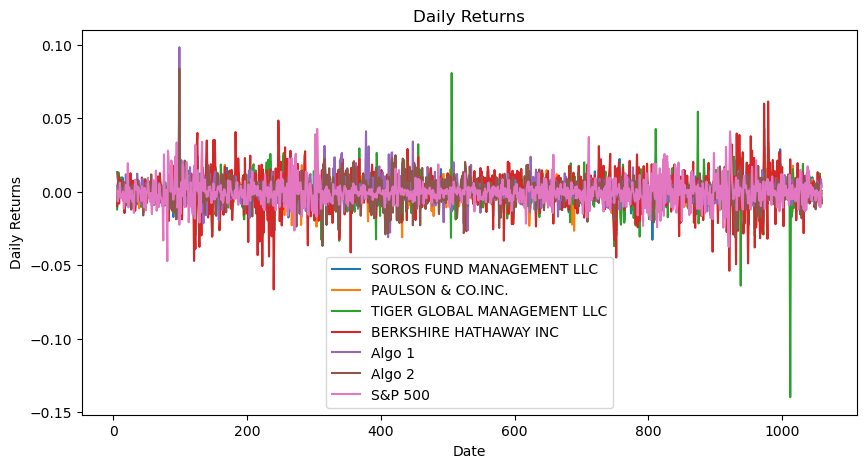

In [62]:
# Plot daily returns of all portfolios

combined_dataframe.plot(figsize=(10,5),title="Daily Returns")
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show


#### Calculate and Plot cumulative returns.

C:\Users\Owner\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Daily Returns:
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-10                   0.000000            0.000000   
2015-03-11                  -1.390912           -1.966750   
2015-03-12                   1.060018            0.989412   
2015-03-13                  -1.302164           -1.139064   
2015-03-16                  -4.163697           -3.508046   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-10                     0.000000                0.000000  0.000000   
2015-03-11                    -1.274177               -0.882260 -0.542965   
2015-03-12                     2.960622              -10.419761 -3.699288   
2015-03-13                    -1.281865               -1.753810 -1.879164   
2015-03-16                    -3.151096               -1.989242  0.080354   

              Alg

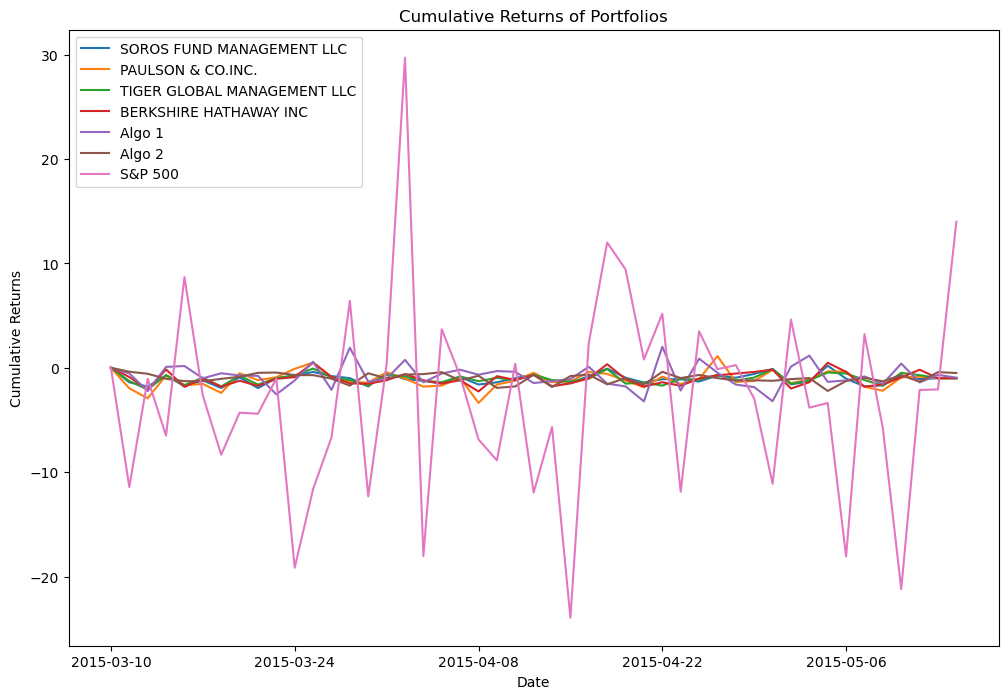

In [63]:
# Calculate cumulative returns of all portfolios

combined_dataframe.set_index("Date", inplace=True)
daily_returns = combined_dataframe.pct_change()
cumulative_returns = (1 + daily_returns).cumprod() - 1
daily_returns = daily_returns.dropna()
cumulative_returns = cumulative_returns.dropna()

print("Daily Returns:")
print(daily_returns.head())

print("\nCumulative Returns:")
print(cumulative_returns.head())

#Plot cumulative returns

cumulative_returns.plot(title='Cumulative Returns of Portfolios', figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.show()

    

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<function matplotlib.pyplot.show(close=None, block=None)>

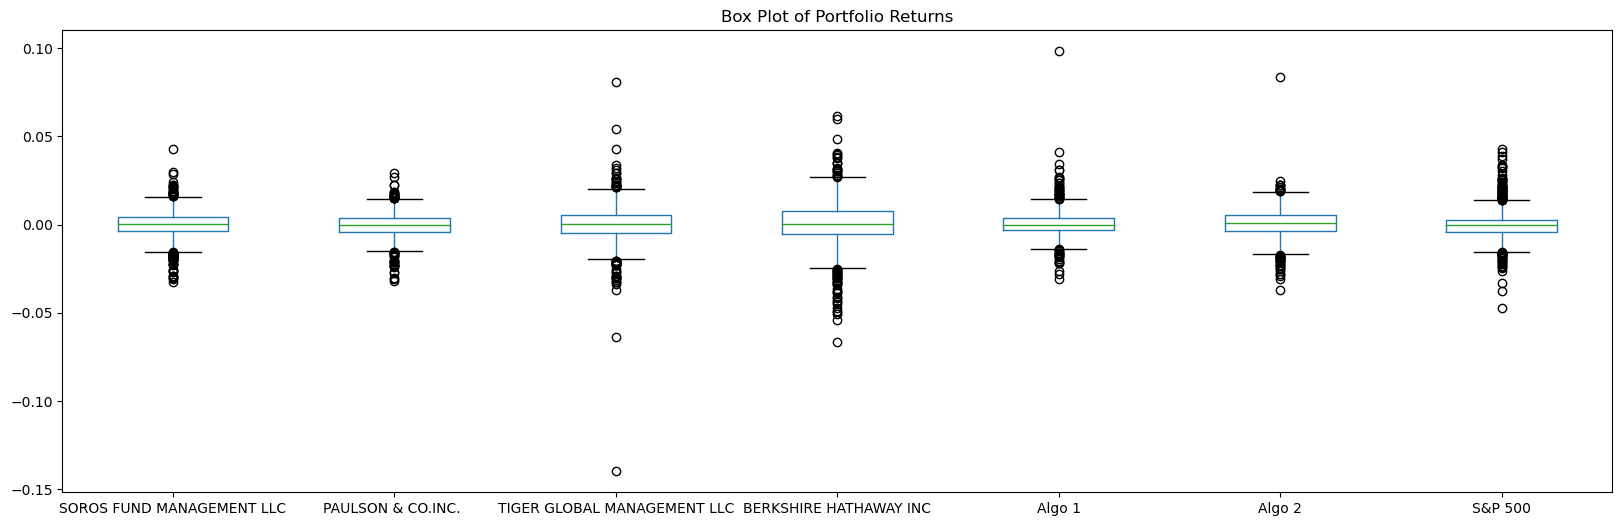

In [25]:
# Box plot to visually show risk
combined_dataframe.boxplot(grid=False,vert=True, figsize=(20,6))
plt.title('Box Plot of Portfolio Returns')
plt.show

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
Daily_STD = combined_dataframe.std()
Daily_STD

SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
Algo 1                         0.007745
Algo 2                         0.008265
S&P 500                        0.008553
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [27]:
# Calculate  the daily standard deviation of S&P 500

sp500_Daily_STD = combined_dataframe['S&P 500'].std()
print("Standard Deviation of S&P 500:",sp500_Daily_STD)

# Determine which portfolios are riskier than the S&P 500

riskier_portfolios = Daily_STD[Daily_STD > sp500_Daily_STD].index.tolist()
print("Portfolios riskier than S&P 500:", riskier_portfolios)


Standard Deviation of S&P 500: 0.008553134241901758
Portfolios riskier than S&P 500: ['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']


### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)

Annualized_STD = Daily_STD*(252**0.5)
print("Annualized_STD:")
print(Annualized_STD)

Annualized_STD:
SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
S&P 500                        0.135777
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-04-08                   0.005549            0.005034   
2015-04-09                   0.004855            0.004803   
2015-04-10                   0.004864            0.004741   
2015-04-13                   0.004791            0.004391   
2015-04-14                   0.004716            0.004361   
...                               ...                 ...   
2019-04-25                   0.004145            0.005572   
2019-04-26                   0.004117            0.005649   
2019-04-29                   0.004123            0.005374   
2019-04-30                   0.004199            0.005408   
2019-05-01                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-04-08                     0.006419             

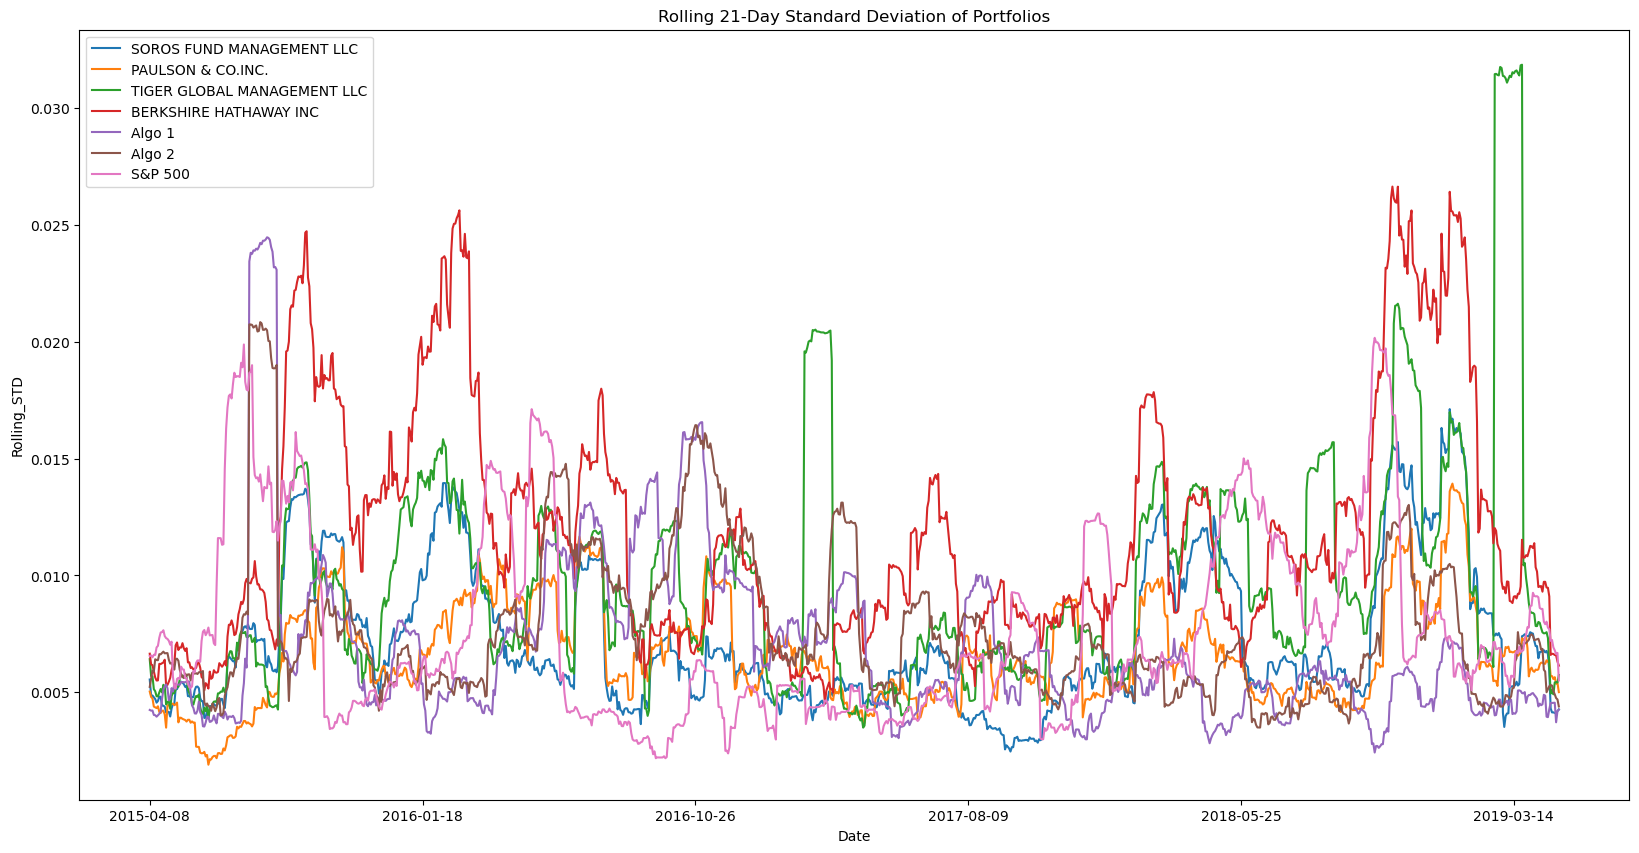

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

Rolling_STD = combined_dataframe.rolling(window=21).std()
Rolling_STD = Rolling_STD.dropna()
print(Rolling_STD)

# Plot the rolling standard deviation

Rolling_STD.plot(title='Rolling 21-Day Standard Deviation of Portfolios', figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Rolling_STD')
plt.legend(loc='upper left')
plt.show()

### Calculate and plot the correlation

In [30]:
# Calculate the correlation

Correlation_Matrix = combined_dataframe.corr()

# Display de correlation matrix
print("Correlation Matrix:")
print(Correlation_Matrix)


Correlation Matrix:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.700191   
PAULSON & CO.INC.                             0.700191            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561548            0.435163   
BERKSHIRE HATHAWAY INC                        0.754025            0.545549   
Algo 1                                       -0.013205           -0.030506   
Algo 2                                       -0.003091           -0.026532   
S&P 500                                      -0.036216           -0.020471   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561548   
PAULSON & CO.INC.                               0.435163   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424908   
Algo 1                                         -0.01453

### Calculate and Plot Beta for a chosen portfolio and the S&P 500


Covariance of SOROS FUND MANAGEMENT LLC with S&P 500: Date
2016-05-11    -1.717202
2016-05-12    -1.738494
2016-05-13    -2.207820
2017-11-07     5.153386
2017-11-08     5.056546
2017-11-09     4.802241
2017-11-10     4.480069
2017-11-13     4.489528
2018-02-12   -46.101838
2018-02-13   -46.289217
2018-05-11    -3.032852
2018-05-14    -2.962707
2018-08-09    81.959585
2018-08-10    81.417057
2018-08-13    82.144855
2018-11-07     3.937622
2018-11-08     2.547012
2018-11-09     2.366152
2018-11-12     2.333017
2018-11-13     2.390335
dtype: float64

Variance of S&P 500: Date
2015-06-05    7296.979432
2015-06-08    7288.898764
2015-06-09    7289.124665
2015-06-10    7186.421162
2015-06-11    7213.388748
                 ...     
2019-04-25      13.145449
2019-04-26      13.048328
2019-04-29    2213.756847
2019-04-30    2213.599047
2019-05-01    2214.047527
Name: S&P 500, Length: 920, dtype: float64

Beta: Date
2015-06-05    7296.979432
2015-06-08    7288.898764
2015-06-09    7289.124665

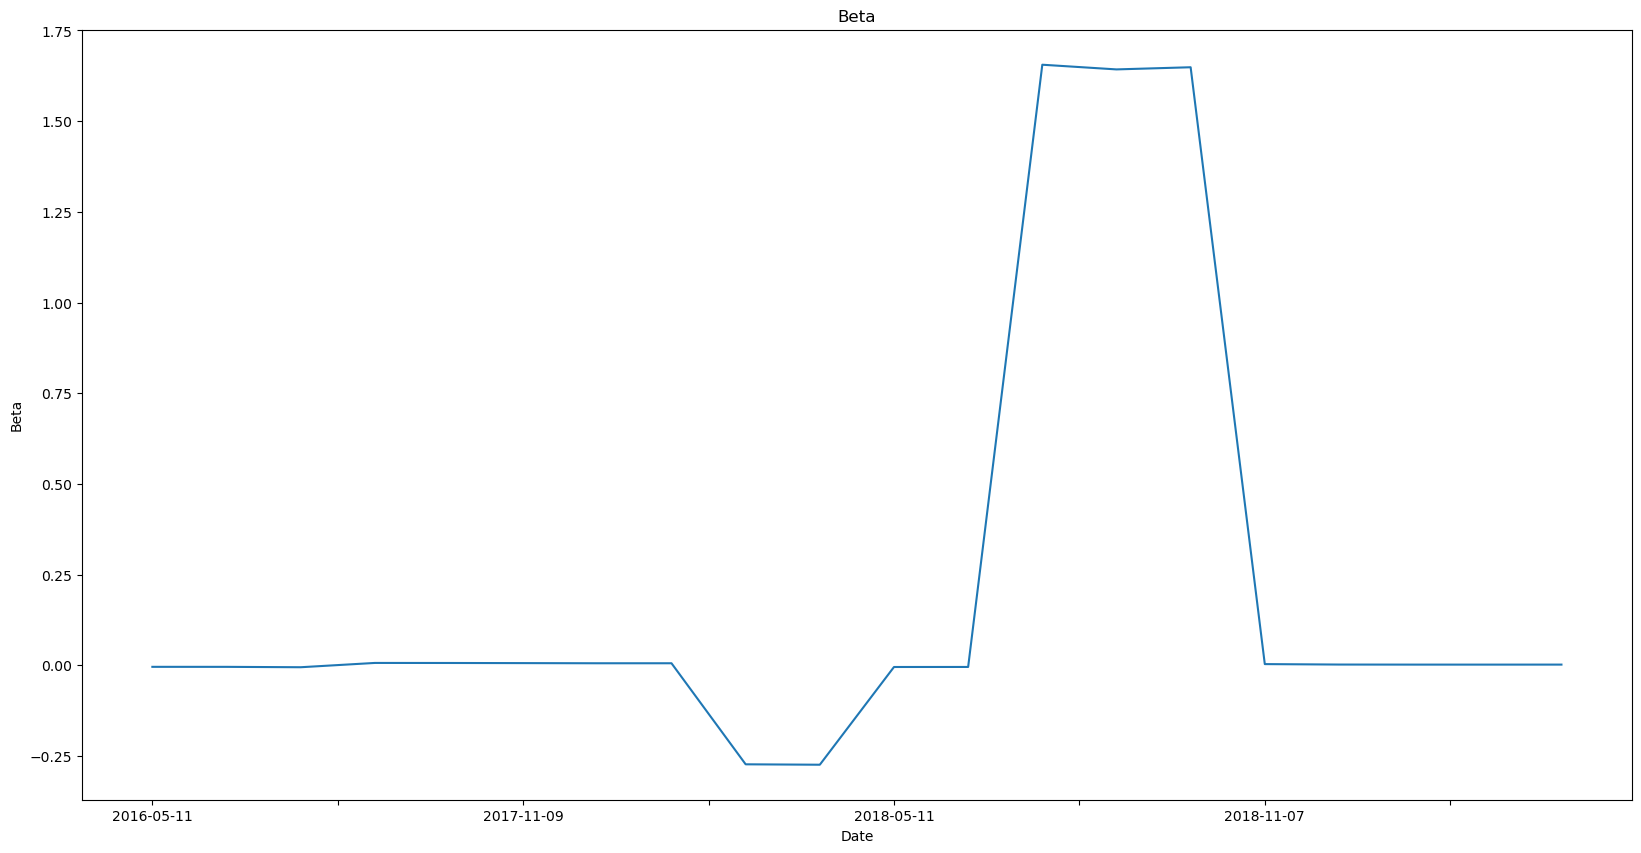

In [31]:
# Calculate covariance of a single portfolio

single_portfolio = "SOROS FUND MANAGEMENT LLC"
covariance_single_portfolio = daily_returns[single_portfolio].rolling(window=60).cov(daily_returns['S&P 500'])
covariance_single_portfolio = covariance_single_portfolio.dropna()
print(f"\nCovariance of {single_portfolio} with S&P 500:", covariance_single_portfolio)


# Calculate variance of S&P 500

variance_sp500 = daily_returns['S&P 500'].rolling(window=60).var()
variance_sp500 = variance_sp500.dropna()
print("\nVariance of S&P 500:", variance_sp500)

# Computing beta
beta = covariance_single_portfolio / variance_sp500
beta = beta.dropna()
print("\nBeta:", variance_sp500)

# Plot beta trend
beta.plot(title='Beta',figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Beta')
plt.show()



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window
rolling_window = 21
ewm_std = daily_returns['S&P 500'].ewm(span=rolling_window).std()
ewm_std = ewm_std.dropna()
print("EWM_STD:")
print(ewm_std)

EWM_STD:
Date
2015-03-12      7.375780
2015-03-13     56.915738
2015-03-16     48.305805
2015-03-17     42.031101
2015-03-18     37.003719
                 ...    
2019-04-25      5.402605
2019-04-26      5.168003
2019-04-29    107.006650
2019-04-30    102.513614
2019-05-01     98.196444
Name: S&P 500, Length: 1038, dtype: float64


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [73]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (daily_returns.mean() / ewm_std) * (252**0.5)
annualized_sharpe_ratios.dropna()
annualized_sharpe_ratios
print("Annualized_Sharpe_Ratios:")
print(annualized_sharpe_ratios)

Annualized_Sharpe_Ratios:
2015-03-12                    NaN
2015-03-13                    NaN
2015-03-16                    NaN
2015-03-17                    NaN
2015-03-18                    NaN
                               ..
BERKSHIRE HATHAWAY INC        NaN
PAULSON & CO.INC.             NaN
S&P 500                       NaN
SOROS FUND MANAGEMENT LLC     NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
Length: 1045, dtype: float64


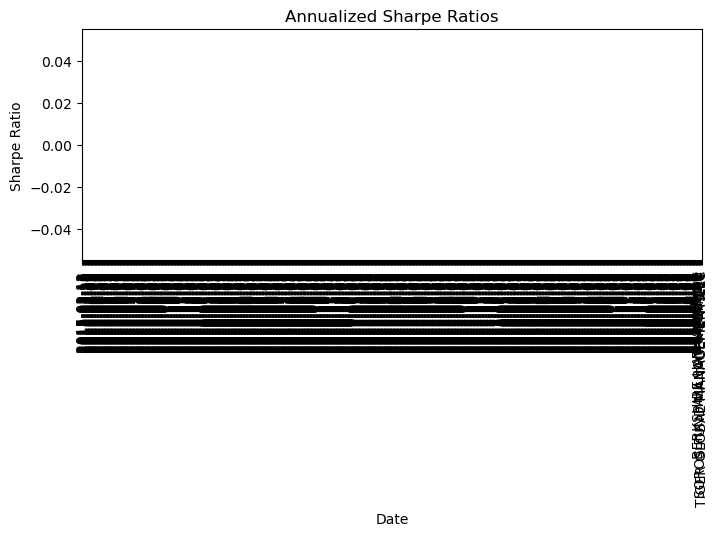

In [76]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind='bar', title='Annualized Sharpe Ratios', figsize=(8,3))
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock
aapl_stock_csv = Path("../Resources/aapl_historical.csv")
aapl_dataframe = pd.read_csv(aapl_stock_csv, index_col='Trade DATE', parse_dates=True)
aapl_dataframe

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [37]:
# Reading data from 2nd stock
goog_stock_csv = Path("../Resources/goog_historical.csv")
goog_dataframe = pd.read_csv(goog_stock_csv, index_col='Trade DATE', parse_dates=True)
goog_dataframe

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [38]:
# Reading data from 3rd stock

cost_stock_csv = Path("../Resources/cost_historical.csv")
cost_dataframe = pd.read_csv(cost_stock_csv, index_col='Trade DATE', parse_dates=True)
cost_dataframe


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [39]:
# Combine all stocks in a single DataFrame
all_stocks_dataframe = pd.concat([aapl_dataframe,goog_dataframe,cost_dataframe], axis=1)
all_stocks_dataframe

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48


In [42]:
# Reset Date index
all_stocks_dataframe.reset_index(inplace=True)
all_stocks_dataframe


,index,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,0,2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
1,1,2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2,2,2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
3,3,2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
4,4,2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62
...,...,...,...,...,...,...,...,...
245,245,2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60
246,246,2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
247,247,2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
248,248,2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88


In [43]:
# Reorganize portfolio data by having a column per symbol

all_stocks_dataframe.columns = ['Index','Date','Symbol','Apple','Symbol','Google','Symbol','Costco']
all_stocks_dataframe.drop(columns=['Symbol'], inplace=True)
all_stocks_dataframe


,Index,Date,Apple,Google,Costco
0,0,2019-05-09,200.72,1162.38,243.47
1,1,2019-05-08,202.90,1166.27,241.34
2,2,2019-05-07,202.86,1174.10,240.18
3,3,2019-05-06,208.48,1189.39,244.23
4,4,2019-05-03,211.75,1185.40,244.62
...,...,...,...,...,...
245,245,2018-05-17,186.99,1078.59,199.60
246,246,2018-05-16,188.18,1081.77,198.71
247,247,2018-05-15,186.44,1079.23,195.48
248,248,2018-05-14,188.15,1100.20,195.88


In [44]:
# Calculate daily returns

all_stocks_returns = all_stocks_dataframe.set_index('Date').pct_change()
all_stocks_returns

# Drop NAs
all_stocks_returns = all_stocks_returns.dropna()
all_stocks_returns = all_stocks_returns.replace([np.inf, -np.inf], np.nan).dropna()
all_stocks_returns.drop(columns=['Index'], inplace=True)
all_stocks_returns

# Display sample data

print("\nDaily Returns for All Stocks:")
print(all_stocks_returns.head())



Daily Returns for All Stocks:
               Apple    Google    Costco
Date                                    
2019-05-07 -0.000197  0.006714 -0.004806
2019-05-06  0.027704  0.013023  0.016862
2019-05-03  0.015685 -0.003355  0.001597
2019-05-02 -0.012279 -0.019226 -0.007890
2019-05-01  0.006550  0.004705 -0.004533


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

apple_weight = 0.333
google_weight = 0.333
costco_weight = 0.333

# Calculate portfolio return

all_stocks_returns['Portfolio'] = all_stocks_returns[["Apple","Google","Costco"]].dot(weights)
all_stocks_returns['Portfolio']

# Display sample data

print("Sample Portfolio Returns for Apple, Google, and Costco:")
print(all_stocks_returns.head())

Sample Portfolio Returns for Apple, Google, and Costco:
               Apple    Google    Costco  Portfolio
Date                                               
2019-05-07 -0.000197  0.006714 -0.004806   0.000570
2019-05-06  0.027704  0.013023  0.016862   0.019196
2019-05-03  0.015685 -0.003355  0.001597   0.004642
2019-05-02 -0.012279 -0.019226 -0.007890  -0.013131
2019-05-01  0.006550  0.004705 -0.004533   0.002241


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame

combined_all_stocks_returns = pd.concat([all_stocks_returns,all_stocks_returns['Portfolio']], axis=1)
combined_all_stocks_returns

,Apple,Google,Costco,Portfolio,Portfolio
Date,,,,,
2019-05-07,-0.000197,0.006714,-0.004806,0.000570,0.000570
2019-05-06,0.027704,0.013023,0.016862,0.019196,0.019196
2019-05-03,0.015685,-0.003355,0.001597,0.004642,0.004642
2019-05-02,-0.012279,-0.019226,-0.007890,-0.013131,-0.013131
2019-05-01,0.006550,0.004705,-0.004533,0.002241,0.002241
...,...,...,...,...,...
2018-05-17,0.003650,0.011469,0.003217,0.006112,0.006112
2018-05-16,0.006364,0.002948,-0.004459,0.001618,0.001618
2018-05-15,-0.009246,-0.002348,-0.016255,-0.009283,-0.009283


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_all_stocks_returns.dropna
combined_all_stocks_returns = combined_all_stocks_returns.loc[:, ~combined_all_stocks_returns.columns.duplicated()]
combined_all_stocks_returns
print(combined_all_stocks_returns)


               Apple    Google    Costco  Portfolio
Date                                               
2019-05-07 -0.000197  0.006714 -0.004806   0.000570
2019-05-06  0.027704  0.013023  0.016862   0.019196
2019-05-03  0.015685 -0.003355  0.001597   0.004642
2019-05-02 -0.012279 -0.019226 -0.007890  -0.013131
2019-05-01  0.006550  0.004705 -0.004533   0.002241
...              ...       ...       ...        ...
2018-05-17  0.003650  0.011469  0.003217   0.006112
2018-05-16  0.006364  0.002948 -0.004459   0.001618
2018-05-15 -0.009246 -0.002348 -0.016255  -0.009283
2018-05-14  0.009172  0.019431  0.002046   0.010216
2018-05-11  0.002339 -0.001763 -0.000613  -0.000012

[248 rows x 4 columns]


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`

annualized_std = combined_all_stocks_returns.std() * (252**0.5)
annualized_std
print("Annualized_Standard Deviation:")
print(annualized_std)
      

Annualized_Standard Deviation:
Apple        0.300791
Google       0.265836
Costco       0.213623
Portfolio    0.212549
dtype: float64


# Calculate and plot rolling `std` with 21-day window 

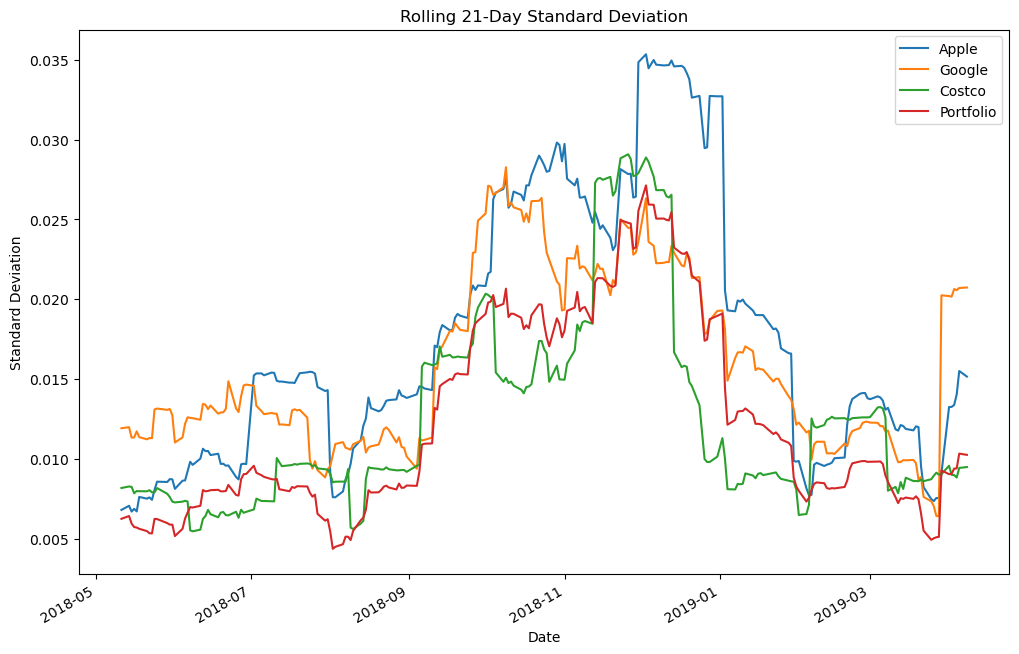

In [49]:
# Calculate rolling standard deviation
rolling_std = combined_all_stocks_returns.rolling(window=21).std()
rolling_std.dropna(inplace=True)
rolling_std

# Plot rolling standard deviation

rolling_std.plot(title='Rolling 21-Day Standard Deviation', figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()



### Calculate and plot the correlation


Correlation:
              Apple    Google    Costco  Portfolio
Apple      1.000000  0.648169  0.415927   0.881285
Google     0.648169  1.000000  0.376021   0.848629
Costco     0.415927  0.376021  1.000000   0.687982
Portfolio  0.881285  0.848629  0.687982   1.000000


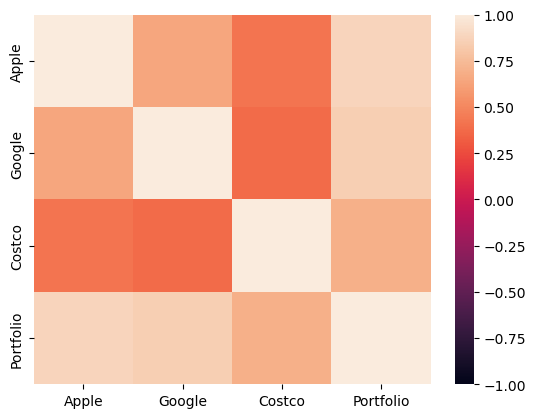

In [50]:
# Calculate and plot the correlation
correlation = combined_all_stocks_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

print("\nCorrelation:")
print(correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [93]:
# Calculate and plot Beta
covariance = combined_all_stocks_returns.rolling(window=60).cov()
covariance = covariance.dropna()
variance_sp500 = daily_returns['S&P 500'].rolling(window=60).var()
variance_sp500 = variance_sp500.dropna()
beta = covariance / variance_sp500
beta = beta.dropna()

print("Covariance")
print(covariance)
print("Variance_sp500")
print(variance_sp500)
print("\nBeta:", beta)

Covariance
                         Apple    Google    Costco  Portfolio
Date                                                         
2019-02-11 Apple      0.000158  0.000074  0.000020   0.000084
           Google     0.000074  0.000225  0.000026   0.000109
           Costco     0.000020  0.000026  0.000106   0.000051
           Portfolio  0.000084  0.000109  0.000051   0.000081
2019-02-08 Apple      0.000159  0.000074  0.000020   0.000084
...                        ...       ...       ...        ...
2018-05-14 Portfolio  0.000068  0.000079  0.000022   0.000056
2018-05-11 Apple      0.000130  0.000068  0.000005   0.000068
           Google     0.000068  0.000157  0.000011   0.000079
           Costco     0.000005  0.000011  0.000051   0.000022
           Portfolio  0.000068  0.000079  0.000022   0.000056

[756 rows x 4 columns]
Variance_sp500
Date
2015-06-04    7306.392516
2015-06-05    7299.981749
2015-06-08    7298.311382
2015-06-09    7195.119149
2015-06-10    7194.385168
         

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios = combined_all_stocks_returns.mean() / combined_all_stocks_returns.std() * (252**0.5)
sharpe_ratios

Apple       -0.098607
Google      -0.097957
Costco      -0.890318
Portfolio   -0.385626
dtype: float64

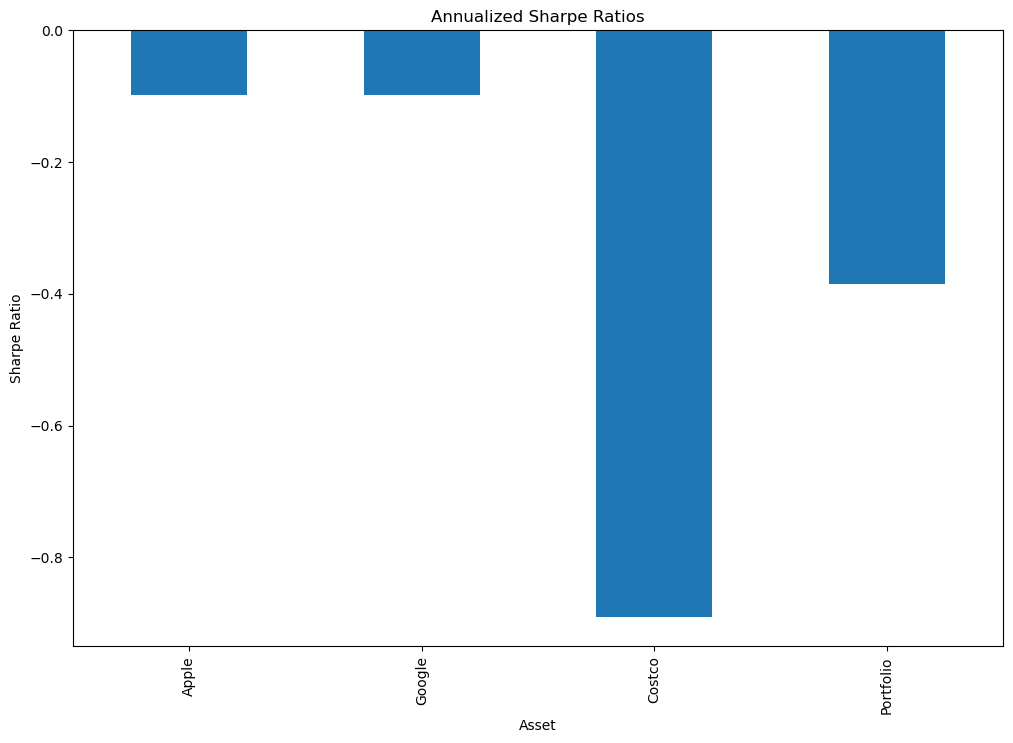

In [96]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind='bar', title= 'Annualized Sharpe Ratios', figsize=(12,8))
plt.xlabel('Asset')
plt.ylabel('Sharpe Ratio')
plt.show()


### How does your portfolio do?

Write your answer here!